In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def build_model(labels, convolutional_layers=2, pooling_layers=True, input_shape=None):
    """
    Creates a simple convolutional network by adding layers based on input
    
    Parameters:
        labels: int
            Number of layers for prediction (i.e. size of output layer of the model). Should be positive and higher than 1.
        convolutional_layers: int (default 2)
            Number of convolutional layers (using tensorflows Conv2D, including the input convolutional layer). Should be positive.
        pooling_layers: bool (default True)
            Whether to include pooling layers between every pair of convolutional layers
        input_shape: (int, int, int) or (int, int) or None (default None):
            Shape of the image that will be given as input (i.e. input shape of the first layer).
            Integers in the tuple are required to be positive.

    Returns:
        model: keras.engine.sequential.Sequential
            Model created according to input
    """
    # Input management
    if not isinstance(labels, int):
        raise ValueError("Different datatype than integer has been given as input for the number of labels")
    
    if not isinstance(convolutional_layers, int):
        raise ValueError("Different datatype than integer has been given as input for the number of convolutional layers")

    if labels < 1:
        raise ValueError("Number of labels is less than 1. Please specify different amount.")

    if labels == 1:
        wrn = "\nYou have entered 1 as the number of labels.\n" 
        wrn += "This might result in unpredicted behaviour and there is not much point in building a model then"
        warnings.warn(wrn)

    if convolutional_layers < 1:
        raise ValueError("This function expects at least one convolutional layer to be present in the model.")

    if not isinstance(pooling_layers, bool):
        raise ValueError("Different datatype than boolean has been given as input for the pooling_layers parameter")

    if input_shape:
        if not isinstance(input_shape, tuple):
            raise ValueError("Input shape has been assigned and different input than tuple was given")
        if len(input_shape) not in [2, 3]:
            raise ValueError("2D or 3D images expected as input")
        elif len(input_shape) == 2:
            input_shape = tuple([*input_shape, 1])
        for val in input_shape:
            if not isinstance(val, int):
                raise ValueError("Integers were expected in place of image dimensions in parameter input_shape")
            if val < 0:
                raise ValueError("One of the dimensions of the input shape given is negative. Please give correct input shape.")

    model = models.Sequential()

    if input_shape:
        model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    else:
        model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    for _ in range(convolutional_layers - 1):
        if pooling_layers:
            model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(labels))
    
    return model

In [4]:
script_dir = os.path.dirname("Image Collection.ipynb")
data_dir = os.path.join(script_dir, "Data")

In [5]:
gestures = ["I", "My", "You", "Your", 
            "In", "To", "With", "Yes", 
            "No", "Well", "I love you",
            "Oh I see", "Name", "Hug",
            "Internet", "Bus", "Money",
            "Work", "Ask", "Go",
            "Look", "Have", "Correct",
            "Want", "Where", 
            "A", "B", "C", "D", 
            "E", "F", "G", "H", 
            "I", "K", "L", "M", 
            "N", "O", "P", "Q", 
            "R", "S", "T", "U", 
            "V", "W", "X", "Y"]

In [6]:
train_images = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                   validation_split=0.25,
                                                                  subset="training",
                                                                  seed=123,
                                                                  image_size=(64, 64),
                                                                  color_mode="grayscale")

Found 24500 files belonging to 49 classes.
Using 18375 files for training.


In [7]:
test_images = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                   validation_split=0.25,
                                                                  subset="validation",
                                                                  seed=123,
                                                                  image_size=(64, 64),
                                                                  color_mode="grayscale")

Found 24500 files belonging to 49 classes.
Using 6125 files for validation.


In [8]:
model = build_model(labels=49, convolutional_layers=4, input_shape=(64, 64))

In [9]:
#model.load_weights("")

In [9]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history = model.fit(train_images, batch_size=20, epochs=5, 
                    validation_data=(test_images))

Epoch 1/5
575/575 [==============================] - 56s 95ms/step - loss: 1.8410 - accuracy: 0.5425 - val_loss: 0.4987 - val_accuracy: 0.8581
Epoch 2/5
575/575 [==============================] - 43s 75ms/step - loss: 0.3256 - accuracy: 0.9061 - val_loss: 0.2452 - val_accuracy: 0.9295
Epoch 3/5
575/575 [==============================] - 45s 78ms/step - loss: 0.1637 - accuracy: 0.9512 - val_loss: 0.1646 - val_accuracy: 0.9540
Epoch 4/5
575/575 [==============================] - 46s 80ms/step - loss: 0.1125 - accuracy: 0.9634 - val_loss: 0.1441 - val_accuracy: 0.9616
Epoch 5/5
575/575 [==============================] - 45s 79ms/step - loss: 0.0883 - accuracy: 0.9724 - val_loss: 0.1734 - val_accuracy: 0.9535


In [10]:
import pandas as pd

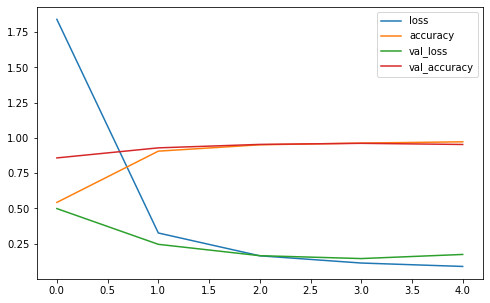

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [13]:
model.save_weights("Weights/weights")

In [29]:
#import numpy as np
#import cv2

#im = cv2.imread("Data/Yes/Yes_2.jpg", cv2.IMREAD_GRAYSCALE)
#im = np.expand_dims(im, axis=0)
#im = np.expand_dims(im, axis=-1)
#prediction = model(im, training=False)
#test_images.class_names[np.argmax(prediction, axis = 1)[0]]